In [9]:
%reset
%matplotlib inline

import numpy as np
import scipy.io
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

import process_data

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Read Data
#### Subjects:
* "NST Alona"
* "NST Christoph"
* "NST Emec"
* "NST Leonard"
* "NST Lukas"
* "Graz B1" - "Graz B9"

In [10]:
#subject = "Graz B3"
subject = "NST Leonard"

# Read Data
raw_data, trials, labels, trial_total, fs, mi_interval, subject_str = process_data.read_data(subject)

# Normalize Raw Data
raw_data = process_data.normalize_data(raw_data, type="std")

# Filter Data
raw_data = process_data.bandpass_filter(raw_data, lowcut=8, highcut=25, fs=fs)

raw_data.shape, trials.shape, labels.shape, trial_total, fs, mi_interval, subject_str

((557008, 4), (144,), (144,), 11, 256, [5, 11], 'NST Leonard')

In [11]:
# Split data into classes
class1_mat, class2_mat = process_data.extract_trials(raw_data, trials, labels, trial_total, fs)
class1_mat.shape, class2_mat.shape

((72, 2816, 4), (72, 2816, 4))

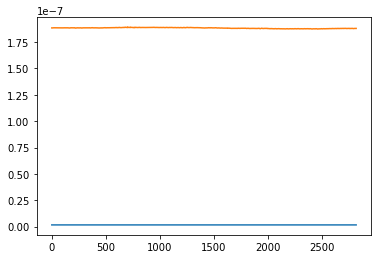

In [12]:
# Mean Power over all trials
class1_means = np.power(class1_mat, 2).mean(axis=0)    # (2000, 6) for axis=0
class2_means = np.power(class2_mat, 2).mean(axis=0)    # (2000, 6) for axis=0

plt.plot(class1_means[:,0])
plt.plot(class1_means[:,1])

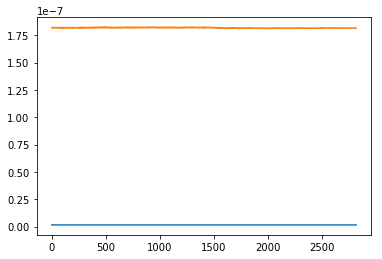

In [13]:
plt.plot(class2_means[:,0])
plt.plot(class2_means[:,1])

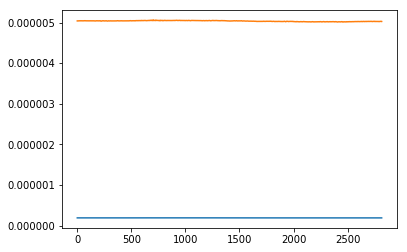

In [14]:
plt.plot(class1_means[:,1])
plt.plot(class1_means[:,2])

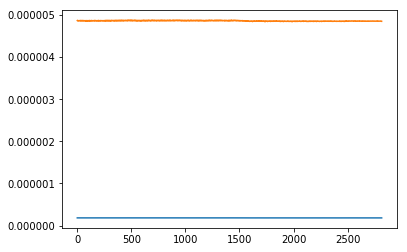

In [15]:
plt.plot(class2_means[:,1])
plt.plot(class2_means[:,2])